<a href="https://colab.research.google.com/github/icaseres/MetNumUN2021II/blob/main/Lab6/group9MontecarloAreas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Integration

**Integrating with Monte Carlo** 
[risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 

Let’s start with a simple integration problem in 1D,

$$\int_0^\pi sen^2x \ dx$$
 
This is easy to solve analytically, and we can use the SymPy library in case you’ve forgotten how to resolve simple integrals.

**integrate(sin^2(x))**

<img src="https://raw.githubusercontent.com/icaseres/MetNumUN2021II/main/Lab6/integral%201.PNG" />

**integrate_{1}^{8}(sin^2(x))dx**


<img src="https://raw.githubusercontent.com/icaseres/MetNumUN2021II/main/Lab6/LA%20Integral%202.PNG" />



## Sympy symbolic integration
* integrate https://docs.sympy.org/latest/modules/integrals/integrals.html 
* Symbol https://docs.sympy.org/latest/modules/core.html#symbol
* cos https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* sin https://docs.sympy.org/latest/modules/functions/elementary.html#cos 
* pi https://docs.sympy.org/latest/modules/core.html#pi 
* Rational https://docs.sympy.org/latest/modules/core.html#rational 
* evaluate https://docs.sympy.org/latest/modules/evalf.html
* basic operations https://docs.sympy.org/latest/tutorial/basic_operations.html

In [1]:
import sympy
from sympy import sin, pi
# we’ll save results using different methods in this data structure, called a dictionary
result = {}  
x = sympy.Symbol("x")
i = sympy.integrate(sin(x)**2)
print(i)
result["analytical"] = float(i.subs(x, 8) - i.subs(x, 1))
print("Analytical result: {}".format(result["analytical"]))

x/2 - sin(x)*cos(x)/2
Analytical result: 3.7993001858726867



We can estimate this integral using a standard Monte Carlo method, where we use the fact that the expectation of a random variable is related to its integral

$$  \int_I f(x) dx = \mathbb{E}_I(f(x)) \times volume(I)$$

We will sample a large number N of points in I and calculate their average, and multiply by the range over which we are integrating.


<img src="https://raw.githubusercontent.com/icaseres/MetNumUN2021II/main/Lab6/Grafica%20integral%202.jpg" />

Generate  $r_1,r_2,\cdots, r_N$ random uniform random points in $[1,8]$ and evaluate the fucntion $f(x)=sin^2(x)$ in ecah random point $f_i = sin^2(r_i)$, calculate the  experimental average of the value fo the fucnction
$$
\overline{f} = \frac{1}{N} \sum_{i=1}^{N} f_i = 544/10000 = 0.544\cdots
$$  
The estimation of $\mathbb{E}_I(f(x))$ is $\overline{f} =0.544\cdots$ and $volume(I)=(8-1)$ therefore the estimation integral is 

$$
\int_1^8 sin^2(x) \ dx \approx volume(I) \times \overline{f} = (8-1) \times 0.544\cdots = 3,808\cdots
$$ 

<img src="https://raw.githubusercontent.com/icaseres/MetNumUN2021II/main/Lab6/Grafica%20montecarlo%20integral%202.jpg" />


In [2]:
import numpy
from sympy import sin, pi
N = 1_000
accum = 0
for i in range(N):
    x = numpy.random.uniform(1, 8)
    accum += sin(x)**2
print(accum)
volume = 8 - 1
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

523.860064838313
Standard Monte Carlo result: 3.66702045386819




*   **integrate_{0}^{10} sin^2(x^3)x dx**


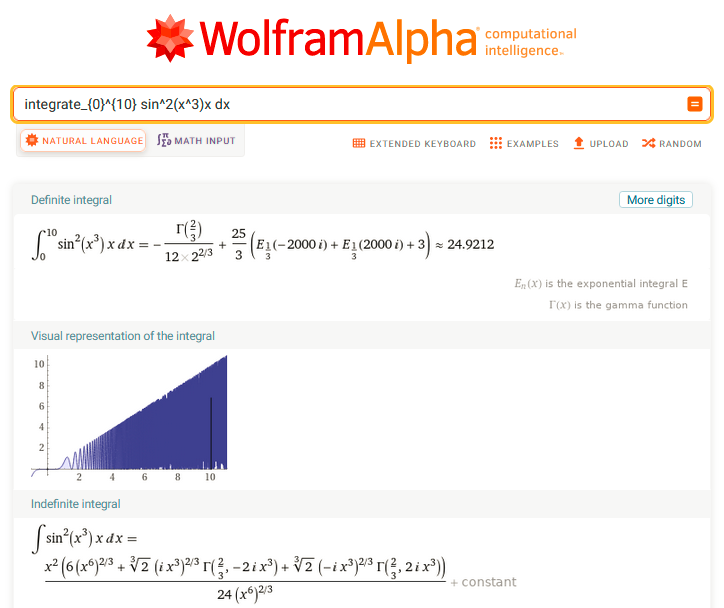

In [3]:
import sympy
x = sympy.Symbol("x")
i = sympy.integrate(sympy.sin(x**3)**2 * x)
print(i)
print(float(i.subs(x, 10) - i.subs(x, 0)))

x**2*gamma(-4/3)*hyper((1/3,), (1/2, 4/3), -x**6)/(3*gamma(-1/3)) - x**2*gamma(-4/3)/(3*gamma(-1/3))
24.92116242396744


In [4]:
import numpy
N = 100_000
accum = 0
l =[]
for i in range(N):
    x = numpy.random.uniform(0, 10)
    accum += numpy.sin(x**3)**2 * x 
volume = 10 - 0
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 25.098787746869792


# Monte Carlo Area Approximation



![MontecarloAreas.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/MontecarloAreas.png)

## Polar Curves - Brilliant

* https://brilliant.org/wiki/polar-curves/

![PolarCurvesBrilliant.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/PolarCurvesBrilliant.png)

### Area inside of polar curve - UT Calculus

* https://web.ma.utexas.edu/users/m408s/m408d/CurrentWeb/LM10-4-2.php

![IntPolarCurvesUTCalculus.png](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Montercarlo/IntPolarCurvesUTCalculus.png)


In [5]:
#icaseres

# Plotting and Calculating the Area with Wolfram Alpha 

## polar r=1*cos4θ, θ in[0,2pi]
![dd.png](https://github.com/icaseres/MetNumUN2021II/blob/main/Varios/dd.png?raw=true)
#1/2 int_0^{2pi} (1*cos4θ)^2 dθ
![ff.png](https://github.com/icaseres/MetNumUN2021II/blob/main/Varios/ff.png?raw=true)
#area under 1/2 (1*cos4t)^ 2 for 0<t<2pi
![gg.png](https://github.com/icaseres/MetNumUN2021II/blob/main/Varios/gg.png?raw=true)
#1/2 integral(1*cosθ)^2 dθ
![sdsd.png](https://github.com/icaseres/MetNumUN2021II/blob/main/Varios/sdsd.png?raw=true)

**Now the area inside the polar curve** $r= 5- \tan(\theta) \cot(2\theta)$

In [8]:
from sympy import integrate, Symbol, cos, sin,tan, cot, pi,  Rational

theta = Symbol('theta')
integrate((5- tan(theta)* cot(2*theta))**2)

16*theta + sin(theta)**3/(12*cos(theta)**3) + 19*sin(theta)/(4*cos(theta)) - tan(theta)/2

In [9]:
Rational(1,2) * integrate((5- tan(theta)* cot(2*theta))**2)

8*theta + sin(theta)**3/(24*cos(theta)**3) + 19*sin(theta)/(8*cos(theta)) - tan(theta)/4

In [10]:
(Rational(1,2) * integrate((5- tan(theta)* cot(2*theta))**2)).subs(theta,2*pi)-(Rational(1,2) * integrate((5- tan(theta)* cot(2*theta))**2)).subs(theta,0)

16*pi

# Scipy numeric integration

* intregrate.quad https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

In [12]:
import scipy.integrate as integrate
import math
result = integrate.quad(lambda theta: ((1/2)*(5-(math.tan(theta)* (math.cos(2*theta)/math.sin(2*theta))))**2), 0, 2*math.pi)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  This is separate from the ipykernel package so we can avoid doing imports until


(1.2226288822717509e+48, 2.5269805454476353e+48)

# Monte Carlo area approximation



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


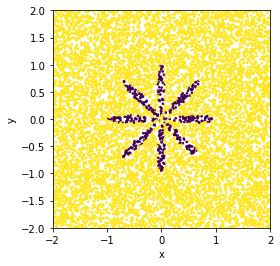

Area approx: 0.7776


In [13]:
import random 
import matplotlib.pyplot as plt
import math

n=10000
count = 0
xlist=[]
ylist=[]
clist=[]
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (math.cos(8*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
# Matplotlib Scatter: Exercise-3 with Solution https://www.w3resource.com/graphics/matplotlib/scatter/matplotlib-scatter-exercise-3.php
# How can I set the aspect ratio in matplotlib?: https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0,2.0 ])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(n))*16)

In [14]:
import random 
import matplotlib.pyplot as plt
import math

n=1000000
count = 0
for i in range(n):
  x=-2.0 + (4.0* random.random())
  y=-2.0 + (4.0* random.random())
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (math.cos(4*theta))):
    count = count +1
print("Area approx:",(count/float(n))*16)

Area approx: 0.78808


Quasi-Monte Carlo

Quasi-Monte Carlo has a rate of convergence close to O(1/N), whereas the rate for the Monte Carlo method is O(N^{−0.5}) - [wikipedia](https://en.wikipedia.org/wiki/Quasi-Monte_Carlo_method)

Halton’s low discrepency sequences -Monte Carlo sampling methods - [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html)

In [15]:
import matplotlib.pyplot as plt
import numpy 
import math

# adapted from https://mail.scipy.org/pipermail/scipy-user/2013-June/034744.html
def halton(dim: int, nbpts: int):
    h = numpy.full(nbpts * dim, numpy.nan)
    p = numpy.full(nbpts, numpy.nan)
    P = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
    lognbpts = math.log(nbpts + 1)
    for i in range(dim):
        b = P[i]
        n = int(math.ceil(lognbpts / math.log(b)))
        for t in range(n):
            p[t] = pow(b, -(t + 1))

        for j in range(nbpts):
            d = j + 1
            sum_ = math.fmod(d, b) * p[0]
            for t in range(1, n):
                d = math.floor(d / b)
                sum_ += math.fmod(d, b) * p[t]

            h[j*dim + i] = sum_
    return h.reshape(nbpts, dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


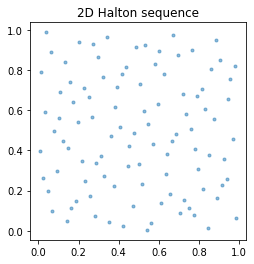

In [16]:
N = 100
seq = halton(2, N)
plt.title("2D Halton sequence")
# Note: we use "alpha=0.5" in the scatterplot so that the plotted points are semi-transparent
# (alpha-transparency of 0.5 out of 1), so that we can see when any points are superimposed.
plt.axes().set_aspect('equal')
plt.scatter(seq[:,0], seq[:,1], marker=".", alpha=0.5);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Area approx: 0.8071111111111111


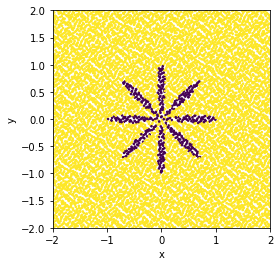

Area approx: 0.8071111111111111


In [17]:
N = 9000
seq = halton(2, N)
count = 0
c=[]
xlist=[]
ylist=[]
clist=[]
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  c=1
  if (r <  (math.cos(8*theta))):
    count = count +1
    c=0
  xlist.append(x)
  ylist.append(y)
  clist.append(c)
print("Area approx:",(count/float(N))*16)
plt.figure()
plt.scatter( xlist, ylist,  c=clist,  s=2.5)
plt.axis([-2.0, 2.0, -2.0, 2.0])
plt.xlabel("x")
plt.ylabel("y")
plt.axes().set_aspect('equal')
plt.show()
print("Area approx:",(count/float(N))*16)


In [18]:
N = 1000000
seq = halton(2, N)
count = 0
for p in seq:
  x=-2.0 + (4.0* p[0])
  y=-2.0 + (4.0* p[1])
  r = math.sqrt(x**2+y**2)
  theta = math.atan(y/x)
  if (r <  (math.cos(8*theta))):
    count = count +1
print("Area approx:",(count/float(N))*16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Area approx: 0.785472


**A higher dimensional integral** [risk-engineering.org](https://risk-engineering.org/notebook/monte-carlo-LHS.html) 


Let us now analyze an integration problem in dimension 4, the Ishigami function. This is a well-known function in numerical optimization and stochastic analysis, because it is very highly non-linear.

In [19]:
import sympy

x1 = sympy.Symbol("x1")
x2 = sympy.Symbol("x2")
x3 = sympy.Symbol("x3")
expr = sympy.cos(x1) + 6*sympy.sin(x2)**2 + 0.2 * x3**3 * sympy.cos(x1)
res = sympy.integrate(expr,
                      (x1, -sympy.pi, sympy.pi),
                      (x2, -sympy.pi, sympy.pi),
                      (x3, -sympy.pi, sympy.pi))
# Note: we use float(res) to convert res from symbolic form to floating point form
result = {} 
result["analytical"] = float(res)
print("Analytical result: {}".format(result["analytical"]))

Analytical result: 744.1506403271957


In [20]:
N = 10_000
accum = 0
for i in range(N):
    xx1 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx2 = numpy.random.uniform(-numpy.pi, numpy.pi)
    xx3 = numpy.random.uniform(-numpy.pi, numpy.pi)
    accum += numpy.cos(xx1) + 6*numpy.sin(xx2)**2 + 0.2 * x3**3 * numpy.cos(xx1)
volume = (2 * numpy.pi)**3
result = {} 
result["MC"] = volume * accum / float(N)
print("Standard Monte Carlo result: {}".format(result["MC"]))

Standard Monte Carlo result: 0.17743457361968*x3**3 + 738.082623752196
